<a href="https://colab.research.google.com/github/AlexN0va/CompVisionIntro/blob/main/ComputerVisionIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computer Vision Project

Computer Vision is a field of AI that enables computers to interpret and analyze visual data, such as images and videos. It is widely used for applications like object detection, image segmentation, facial recognition, and more.

There are many libraries out there, but the most popluar and most intruiging for me is Oopencv. OpenCV (Open Source Computer Vision Library) is a powerful, open-source library that simplifies computer vision tasks with its extensive collection of image processing and machine learning tools.

With OpenCV, we can:
- **Detect Objects**: Using techniques like contour detection or pre-trained models, we can locate and analyze objects in an image or video.
- **Detect Colors**: By working with color spaces like RGB or HSV, OpenCV allows precise color filtering for tasks such as object tracking or segmentation.
- **Preprocess Images**: Tools like thresholding, blurring, and edge detection make it easier to enhance images and isolate regions of interest.

This notebook explores some fundamental concepts, such as object and color detection, while integrating notes for better understanding. Here is what I follow https://docs.opencv.org/3.4/d6/d00/tutorial_py_root.html
https://www.youtube.com/watch?v=eDIj5LuIL4A

# What are Images?

- in the context of computer vision and image processing, images are typically represented as NumPy arrays
- and image is made by "pixels" or blocks of colors
- in **most cases** the pixel value will range from 0 to 255 (BGR images)
- in **binary images** pixel values are in [0,1] or ([0,255])
- in 16 bit images the pixel value ranges from 0 to 65535
- **RGB** is the standard color model for most digital displays and image formats, while BGR is typically used in specialized image processing applications like OpenCV.



In [ ]:
import cv2

image = cv2.imread("some_image.png")
print(type(image)) # will result in numpy array

print(image.shape) #An image is a shape given by the height wdith and number of color channels (RGB will be 3 channels)

<class 'numpy.ndarray'>
(903, 1393, 3)


# Input / Output Data

## Images

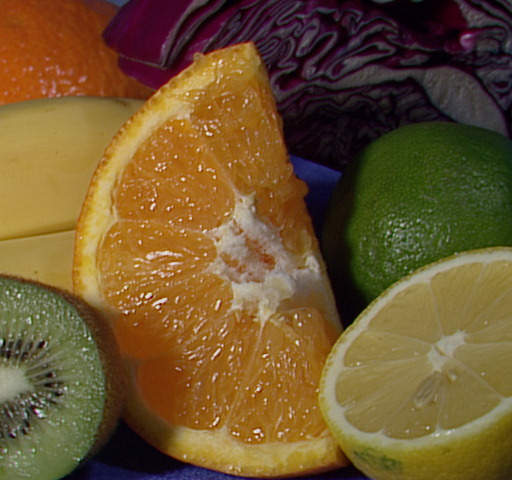

-1

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

#Read data from a folder
image = cv2.imread("data/fruits.jpg")

#Write data into a folder
cv2.imwrite("data/fruits_out.jpg",  image)

#Visualize Dat
cv2_imshow(image) # IMPORTAANT: Normally we use cv2.imshow("Window Name", cv2 image instance), but colab doesnt support that
cv2.waitKey(0) #wait until I press 0 to open. The argument coresponds to the time you want the image to open. if you input 0 then it will just default to stay open until you close window

## Video

In [ ]:
import cv2
#ps. writing a video into a folder is much harder than it is for an image


#Read video
video = cv2.VideoCapture("data/video_name")

#Vizualize video
ret = True
while ret:
  ret, frame = video.read() #frame is the actual frame we are reading to show/ ret is a alias boolean that will tell us if frame was read succesfully or not
  #once we reached end of video we will nto have any frame and ret will be false and stop the while loop
  if ret:
    cv2.imshow('video window', frame)
    cv2.waitKey("Number of frames of video") #we need to get the fps and divide 1 by the fps. we are essientally giving the effect that we are runignthe video but we are just swiching frame

video.release()
cv2.destroyAllWindows()#make sure to call these whenever reading and showing a video because this esnure that the memory is deleted that we just used

## Webcam

Side note. When I was testing this on Vscode it is important to recognize that python works in different enviroemtns adn you may have packags intalled in one envioment and not another. git bash has its own enviroemnt. you can mae a virtual envrioment. your python version have differnet enviroments. in my case my vsCode was using python 3.12.1 but my opencv was installed on my 3.10.1 version.

In [ ]:
import cv2
#read webcam
webcam = cv2.VideoCapture(0) # the argument is the number of the webcam you want to access. most likely to be 0

while True: # unlike video reading, with a webcam there is no end to the number of frames. we decid whent eh video/webcam is over
  ret, frame = webcam.read()
  cv2.imshow('frame', frame)
  if cv2.waitKey(40) & 0xFF == ord('q'): # when we past 40 miliseconds and when the user presses q
    break #we put 40 but


webcam.release
cv2.destroyAllWindows()

# Basic Image Operations

## Resize

(480, 512, 3)
(256, 240, 3)


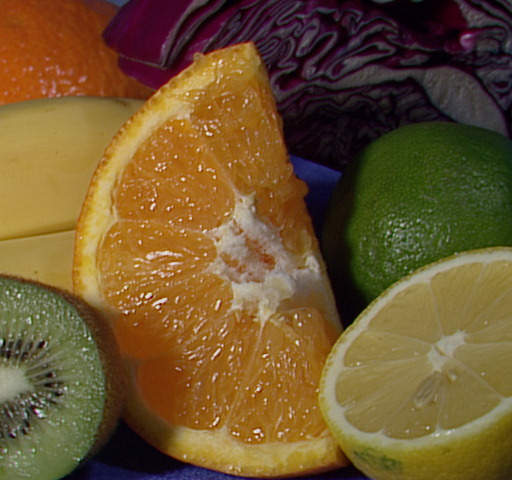

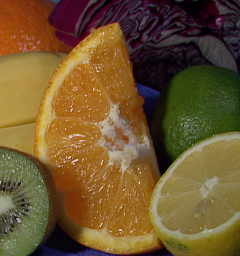

In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow #this allows us to the use the cv2_imshow rather than the cv2.imshow which doesnt owrk on jupyter notbook


img = cv2.imread("data/fruits.jpg")

resized_img = cv2.resize(img, (240, 256))

print(img.shape)
print(resized_img.shape)

cv2_imshow(img)
cv2_imshow(resized_img)

## Crop

(384, 512, 3)


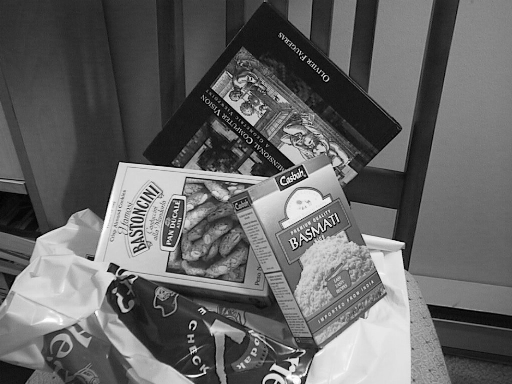

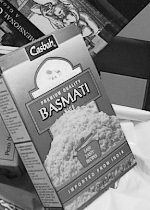

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("data/box.png")

print(img.shape)
#what if I just want one of those boxes
crop_img = img[130:340:, 250:400 ]
cv2_imshow(img)
cv2_imshow(crop_img)



## Color Spaces

- Back to what I was mentioning before. opencv works in a BGR color space rather than RGB. however, this is simply becuase early opencv developers liked bgr rather than rgb. ALTHOUGH!! RGB is better and it is important to convert your image to RGB later on
- However, the enormous amoutsn of colors apces all have their unqiue use cases, from color detection to image proccesing
-RGB (Red, Green, Blue): Used for displaying colors on computer monitors and TVs.
-CMYK (Cyan, Magenta, Yellow, Key): Used for printing, such as in graphic design and commercial printing.
LAB (Lightness, A, B): Used for color correction and image enhancement.
-HSV/HSL (Hue, Saturation, Value/Lightness): Used for image processing and computer vision applications.

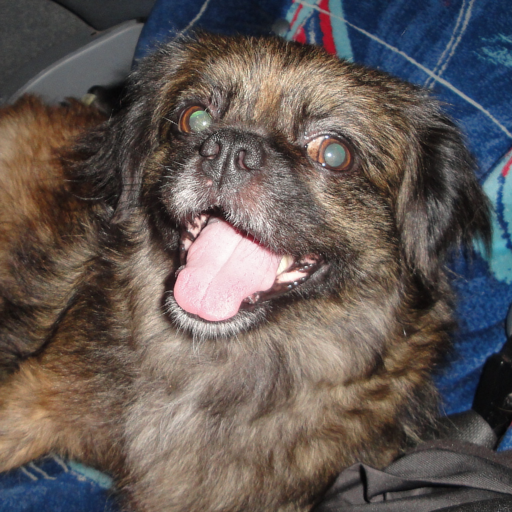

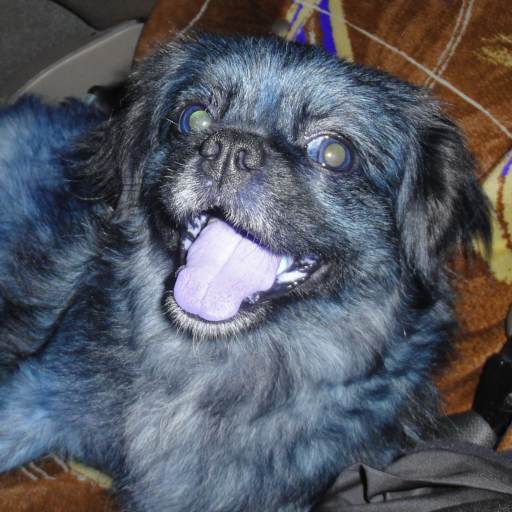

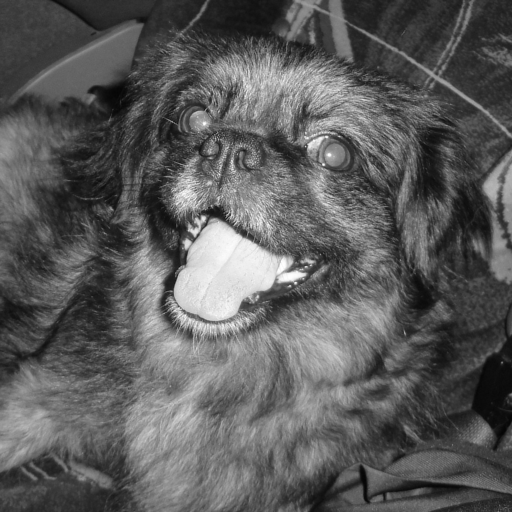

In [ ]:
import cv2

img = cv2.imread("data/dog.png")
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #convert an image into another color space. BGR2RGB swithced blue to red and vice versa
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)
cv2_imshow(RGB_img)
cv2_imshow(gray_img)

## Blurring

There are a couple function that opencv has...

- blur()
- GaussianBlur()
- medianblur()
- bilateralFilter()

How to think about blurrign is that you are esseitnally getting averages. eveyrtime you do a blur you compute avergae. what a blur does it goes to a specific pixel and gives that pixel a new value based on the avergae of all the other pixels around it. High level intuition!! Normalized Box Filter.

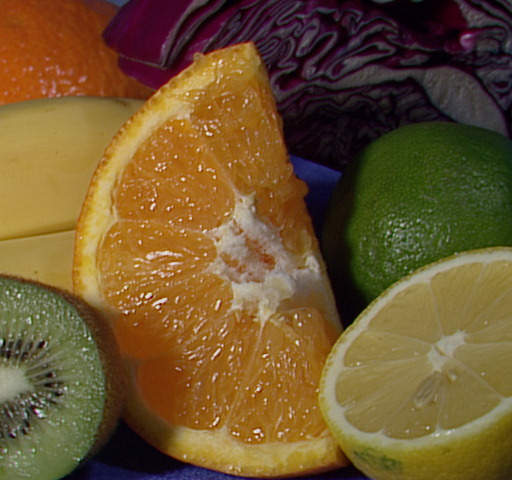

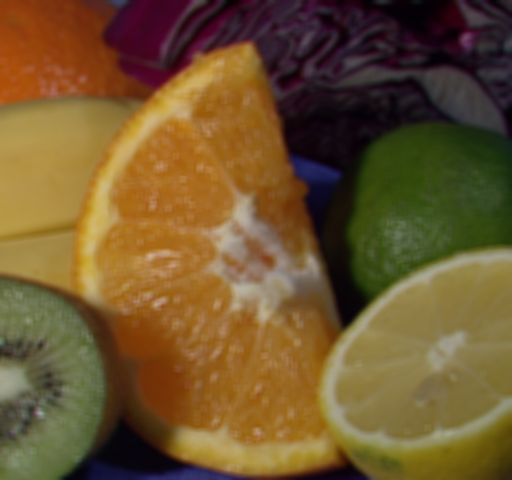

In [ ]:
import cv2
from google.colab.patches import cv2_imshow


img = cv2.imread("data/fruits.jpg")
k_size = 7 # this is the proximity of how many pixels are are going to use to calculate the average


#Normal Blur
imgBlur = cv2.blur(img, (k_size, k_size)) # The second paramter is the widht and length of the neighborhood we ar using to apply the blur

#GaussionBlur
imgGau = cv2.GaussianBlur(img, (k_size, k_size), 3) # same as before but needs additional paramter. not too different from normla blur

#MedianBlur
imgMed = cv2.medianBlur(img, (k_size, k_size)) # Does give more of a cartoon look. #can be used to remove noise

cv2_imshow(img)
cv2_imshow(imgBlur)
cv2_imshow(imgGau)
cv2_imshow(imgMed)

# Nitty Gritty

##Thresholding

What is Image Thresholding?
- Image thresholding is a technique used to simplify images by converting them into binary images (black and white). The goal is to make an image easier to analyze by isolating certain parts of it, like objects, edges, or regions of interest.

How Does It Work?
- For each pixel in the image, compare its value (brightness or intensity) to a threshold value.
Based on the comparison:
  - If the pixel’s value is above the threshold → Set it to white (or 255 in grayscale).
   -If the pixel’s value is below the threshold → Set it to black (or 0 in grayscale).
- This transforms a complex image into something more binary and high-contrast, which is often easier for object detection, contour finding, or other image processing tasks.

The idea is to convert a multi color image in a binary image so most likely black and white

## NOTE for whole project!

Keep in mind that a lot fo opencv fuctions return two varaibles. One if a status/return value and the other is the actual output that you excpect. So when you see a varaible being initialized with ret, ret means return value which is like the status to shcekc if we are gettign output of if there is not output or there is an error.

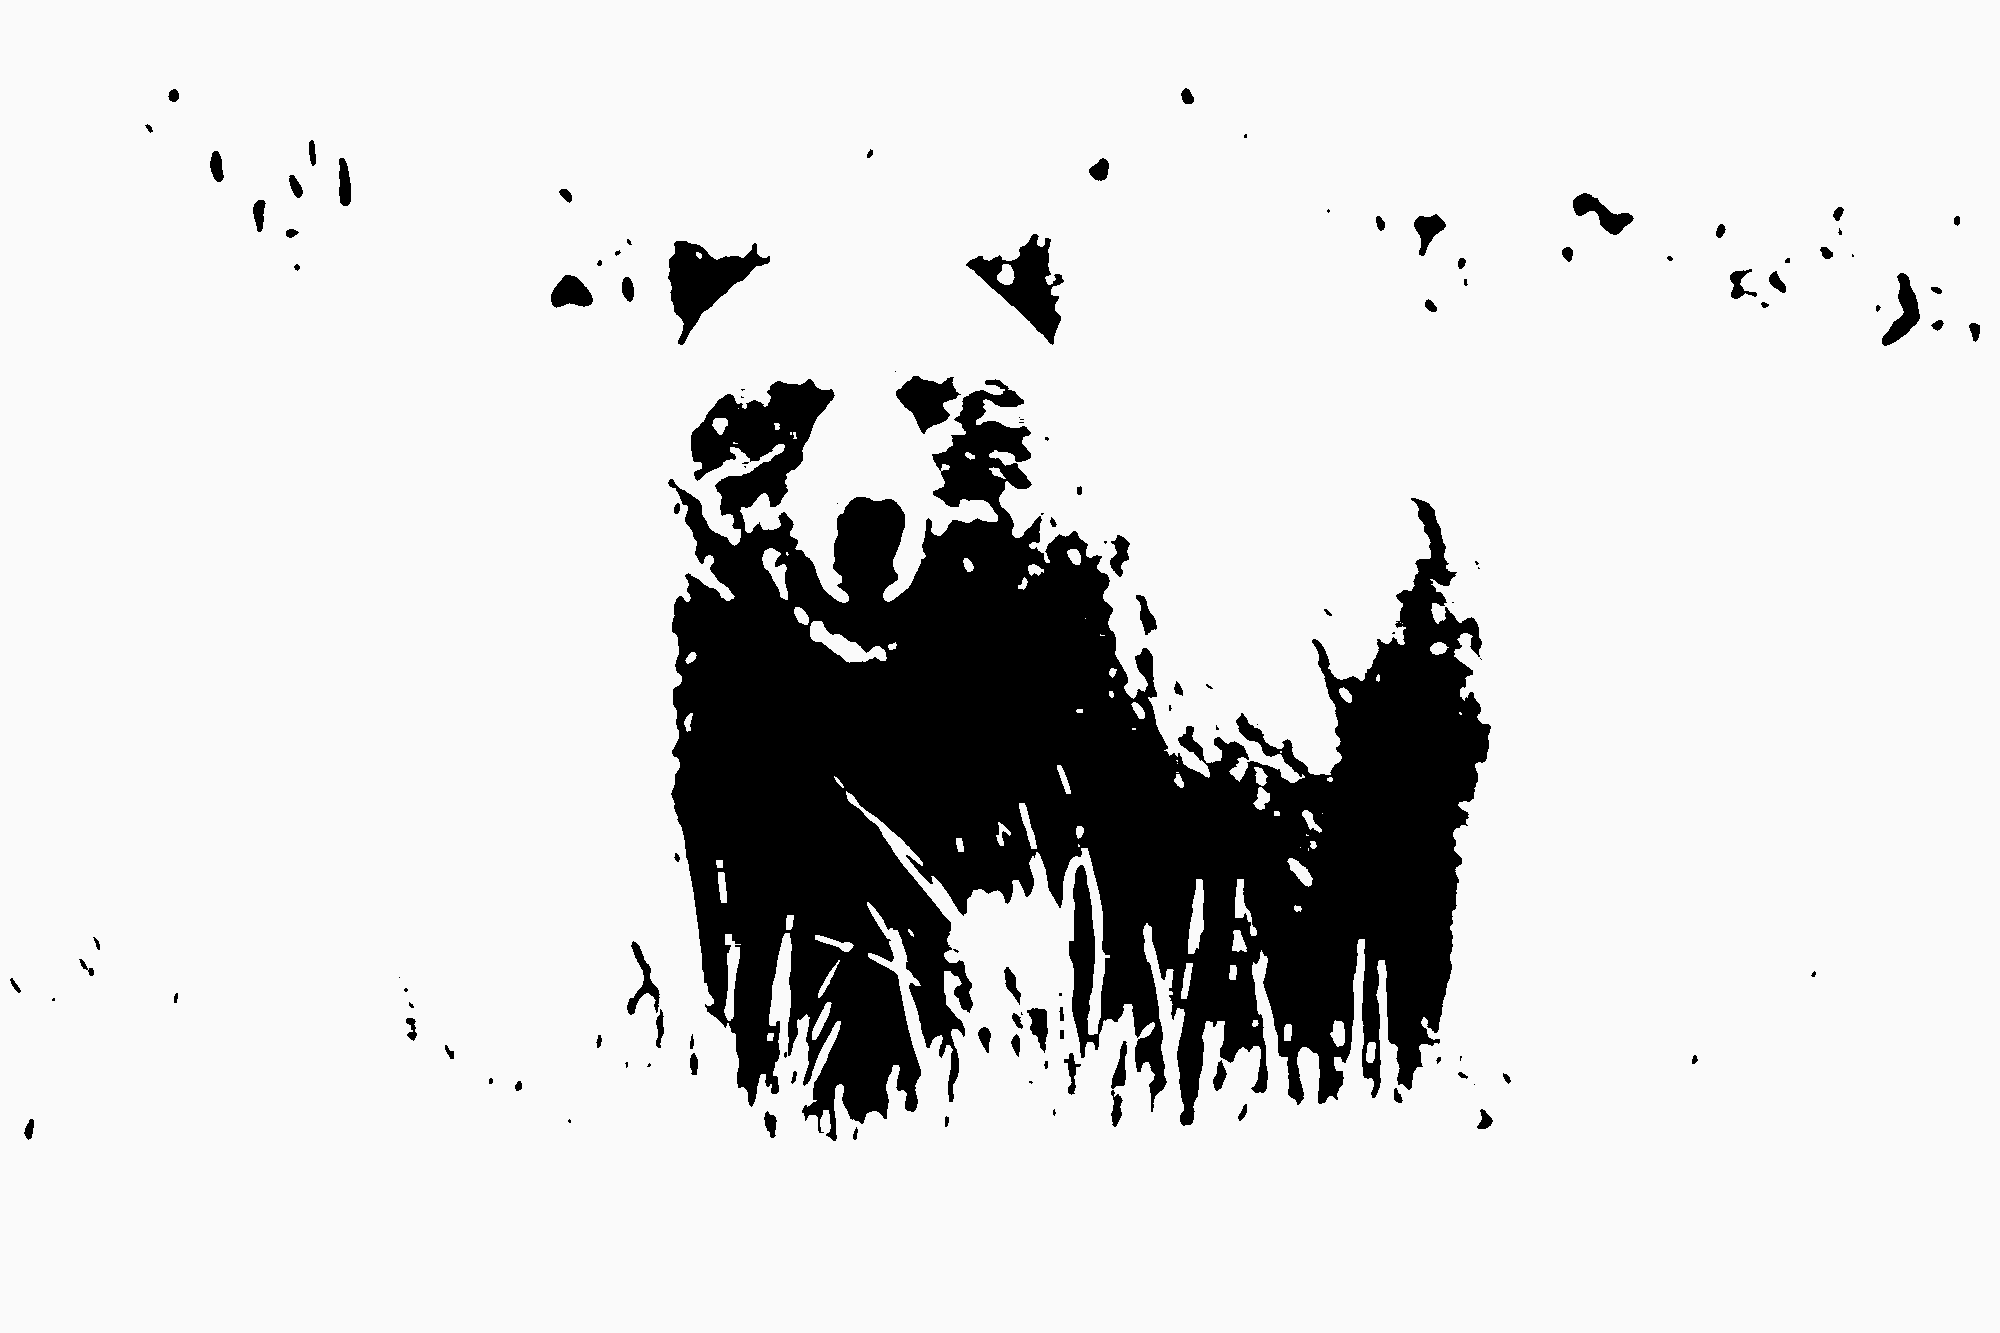

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img1 = cv2.imread("data/dog.png")
img2 = cv2.imread("data/bear.jpg")

img1G = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2G = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(img2G, 80, 250, cv2.THRESH_BINARY) #The number we pass in is the threshold so every number less than 80 will go to 0 and any number above 80 will go to second argument
#cv2 has differnyt theshold types, we choose binary. thsi can be recognized in the last parameter
#thresholding can be used for image segmentation

thresh = cv2.blur(thresh, (10, 10)) # Lest remove some of the noise in the back of the image
ret, thresh = cv2.threshold(thresh, 80, 250, cv2.THRESH_BINARY)

#cv2_imshow(img2G)
cv2_imshow(thresh)

## Edge Detection

There are three different edge detectors that you can use with opencv...

- Sobel Derivatives
- Laplace Operator
- Canny edge Detector

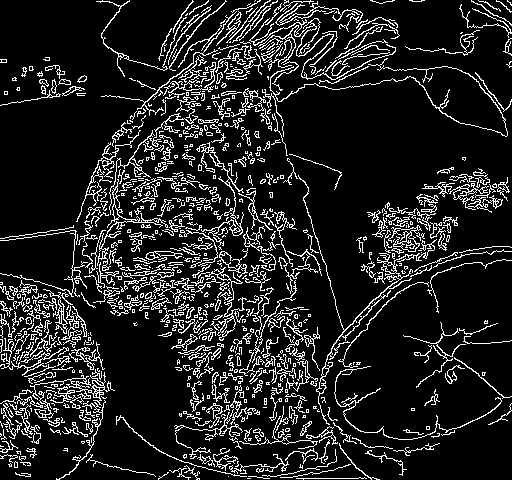

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

img = cv2.imread("data/fruits.jpg")

imgEdge = cv2.Canny(img, 50, 200) # these valuea re related to Hysteresis Thresholding
#which tells us the upper limit and lower limit of what is a edge and what isnt an edge

imgEdgeDilate = cv2.dilate(imgEdge, np.ones((5,5), dtype=np.int8)) #make our edge lines thicker

cv2_imshow(imgEdge)

## Image Drawing

(433, 612, 3)


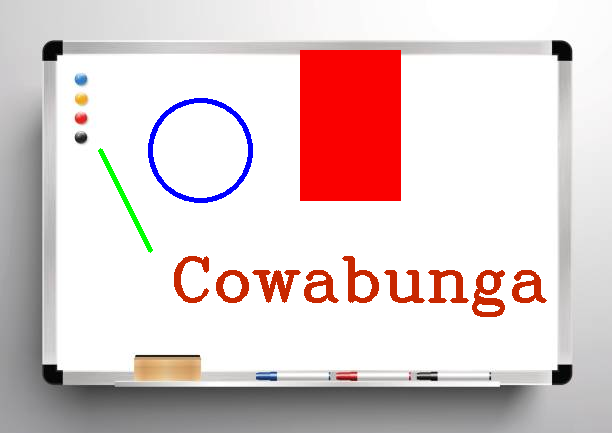

In [ ]:
import cv2
from google.colab.patches import cv2_imshow


img = cv2.imread("data/board.jpg")
print(img.shape)

#line
cv2.line(img, (100, 150), (150, 250), (0, 255, 0), 3)

#rectangle
cv2.rectangle(img, (300, 50), (400, 200), (0,0,250), -1)

#circle
cv2.circle(img, (200, 150), 50, (255,0,0), 3)

#text
cv2.putText(img, "Cowabunga", (170, 300), cv2.FONT_HERSHEY_COMPLEX, 2 ,(0,40,200), 3)

cv2_imshow(img)


## Contours

Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.
Since OpenCV 3.2, findContours() no longer modifies the source image but returns a modified image as the first of three return parameters.
In OpenCV, finding contours is like finding white object from black background. So remember, object to be found should be white and background should be black.

Contours can help with object detection, in particular with this case the things we want to detect are much darker than the white background. Somehwat a binary image and this is the type of image we want for object detection.

Contours are outlines or boundaries of objects in an image, detected based on differences in intensity or color. They help isolate and analyze objects of interest by providing their shape, size, and position. In your case, contours can be used to identify and focus on the main object while removing background noise or irrelevant regions. This makes it easier to process and analyze the object in computer vision tasks.

How to draw the contours?
To draw the contours, cv.drawContours function is used. It can also be used to draw any shape provided you have its boundary points. Its first argument is source image, second argument is the contours which should be passed as a Python list, third argument is index of contours (useful when drawing individual contour. To draw all contours, pass -1) and remaining arguments are color, thickness etc.

To draw all the contours in an image:
cv.drawContours(img, contours, -1, (0,255,0), 3)
To draw an individual contour, say 4th contour:
cv.drawContours(img, contours, 3, (0,255,0), 3)
But most of the time, below method will be useful:
cnt = contours[4]
cv.drawContours(img, [cnt], 0, (0,255,0), 3)

OpenCV version: 4.10.0


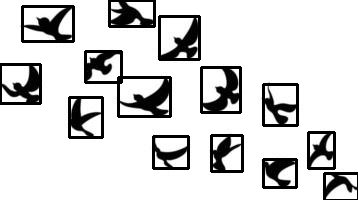

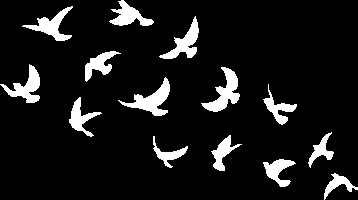

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

print("OpenCV version:", cv2.__version__)


img = cv2.imread("data/birds.jpg")

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(img, 127, 255,cv2.THRESH_BINARY_INV) #Everything lower than 127 goes to 255 and vice versa. this is the inveresed threshold as you cantell with eargument _INV
#To work with contours we need our object to be white and backgroudn to be black

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #remember that  contour is a outline of a object.
#the return value for the varible contours will be each oen fot he birds since each on eof them is a . All the isolated birds at least. If some white object collides then will be seen as one


for cnt in contours:
  if cv2.contourArea(cnt) > 200: # lest print our each one of the birds area. however to make sure we dont get the are of noise data lets get the area of everyhthing bigger than 200 pixels
    #cv2.drawContours(img, cnt, -1, (0,0,255), 1) #This will draw the contours of the birds. so it wil draw little dots around the bird

    x1, y1, w, h = cv2.boundingRect(cnt) # grab the coordinates of the the reactangle that is surounding the object.

    cv2.rectangle(img, (x1,y1), (x1 + w, y1 + h), (0, 255, 0), 2) # create a rectangle with the coordinates given by the bounding rectangle

    #This goes to shwo that sometimes you dont ned the state of the art technolgoe sliek YOLO or detectron. this uses simply image detection tehcniques.

cv2_imshow(img)
cv2_imshow(thresh)


# Project 1

Color Detection

# Project 2

Face Anonymizer

# What is Needed for computer vision in automotive industry

For a career in computer vision for self-driving cars, focus on these **key skills**:

### **Core Skills**
- **Object Detection & Tracking**: YOLO, Faster R-CNN, tracking algorithms.
- **Semantic & Instance Segmentation**: U-Net, Mask R-CNN for identifying lanes, road signs, and objects.
- **Depth & 3D Perception**: Stereo vision, LiDAR, SLAM.
- **Sensor Fusion**: Combining camera, LiDAR, and radar data using Kalman Filters.

### **Tools & Frameworks**
- **Programming**: Python, OpenCV.
- **Deep Learning**: TensorFlow, PyTorch.
- **Hardware**: ROS (Robot Operating System), NVIDIA Jetson, LiDAR sensors.

### **Math Foundations**
- **Linear Algebra**: 3D transformations and camera calibration.
- **Probability**: For uncertainty modeling (Kalman Filters).

### **Project Ideas**
1. Build an object detection system for pedestrians and cars.
2. Create a lane detection pipeline with OpenCV or deep learning.
3. Work on SLAM for 3D mapping.

Master these skills, and you'll be well-prepared for autonomous vehicle development!